# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [91]:
data = pd.read_csv('foodhub_order.csv')

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Use shape attribute to get number of rows and columns
print('The data set consist of '+str(df.shape[0])+' rows and '+str(df.shape[1])+' columns')
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

The data set consist of 1898 rows and 9 columns
There are 1898 rows and 9 columns.


#### Observations:


- As expected, the number of colums corresponds to the specification, that is 9 columns with 1898 rows of data.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [7]:
# print the type of each column
datatypes=df.iloc[0,:].apply(type).value_counts()
for x in range(0,datatypes.shape[0]):
    print('For data type:' + str(datatypes.index.values[x]) + ' there are ' + str(datatypes[x]) + ' columns')

For data type:<class 'numpy.int64'> there are 4 columns
For data type:<class 'str'> there are 4 columns
For data type:<class 'numpy.float64'> there are 1 columns


#### Observations:


- We have 5 numerical columns, 1 of type float and 4 of integer type.
- The are also 4 columns of string type.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Test for possible null values, counting them for each column
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [9]:
# A simpler way is to just checck for any null value in any field.
df.isnull().values.any()

False

In [10]:
#Are there any duplicate rows?
df.duplicated().sum()

0

In [11]:
# let's check the total number of unique values in the order_id column
df['order_id'].nunique()

1898

In [12]:
# Check the categorical string colums to find possible invalid entries
cat_cols = ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 50)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64
--------------------------------------------------
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64
--------------------------------------------------
Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64
--------------------------------------------------
Not given    736
5        

In [13]:
# Printing the percentage of unique categorical levels in each column
for column in cat_cols:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)

Shake Shack                  0.115385
The Meatball Shop            0.069547
Blue Ribbon Sushi            0.062698
Blue Ribbon Fried Chicken    0.050580
Parm                         0.035827
                               ...   
Sushi Choshi                 0.000527
Dos Caminos Soho             0.000527
La Follia                    0.000527
Philippe Chow                0.000527
'wichcraft                   0.000527
Name: restaurant_name, Length: 178, dtype: float64
--------------------------------------------------
American          0.307692
Japanese          0.247629
Italian           0.157007
Chinese           0.113277
Mexican           0.040569
Indian            0.038462
Middle Eastern    0.025817
Mediterranean     0.024236
Thai              0.010011
French            0.009484
Southern          0.008957
Korean            0.006849
Spanish           0.006322
Vietnamese        0.003688
Name: cuisine_type, dtype: float64
--------------------------------------------------
Weekend    0.711

We see that the ratinghas either integer numbers from 2 to 5 or the 'No given' categorical value. Let's assume that valid rating values are from 1 to 5 and we will assign the 0 value to indicate that no rating was provided. This will allows us to treat the 'rating' column as numeric.

In [14]:
#replace 'Not given' with 0 and change the type to int 
test=df.loc[df['rating']=='Not given', 'rating']=0
df['rating']=df['rating'].astype(int)

In [15]:
#verify that in effect rating is now numeric
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1898.0,2.659642e+00,2.195280,0.00,0.00,4.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [16]:
#Show the first 5 rows of the data.
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,0,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,0,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:


- Null is not part of the data.
- For 'rating', although 'Not given' is not really missing, we will treat it as such and will assign a rating of 0. This will simplify somehow some of the data analysis.
- Removing the rows with this "missing" value for rating is not an option since more important information for each order is required, that is 'cost_of_the_order' is quite important.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [17]:
# Use describe() method to get the statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1898.0,2.659642e+00,2.195280,0.00,0.00,4.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [23]:
print('The (min,max) food preparation time is (',df['food_preparation_time'].min(), ",",df['food_preparation_time'].max(), ') with a (mean,std) of (', round(df['food_preparation_time'].mean(),3),',',round(df['food_preparation_time'].std(),3),')' )

The (min,max) food preparation time is ( 20 , 35 ) with a (mean,std) of ( 27.372 , 4.632 )


#### Observations:


- All numerical columns have what seems to be valid min/max values.
- No outliers seem to be present at this time.

### **Question 5:** How many orders are not rated? [1 mark]

In [27]:
# Since we replace 'Not rated' with 0, we just need to count the number of 0 ratings.
df['rating'].value_counts()[0]

736

In [28]:
print(df['rating'].value_counts(normalize=True))

0    0.387777
5    0.309800
4    0.203372
3    0.099052
Name: rating, dtype: float64


#### Observations:


- The number of order not rated is 736, that represents the 38.8% of the number of records.
- It would be a good idea to try to promote that the users provide a rating.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Utilities

Let's start by defining some plotting function that will simplify the coding as we analize each column

In [53]:
# Utility function for plotting categorical and continous columns

def histogram_boxplot(feature, figsize=(10, 5), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

def histogram_simple(data, feature, hue, figsize=(10, 5), bins="auto"):
    """ Simple histogram plot
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    plt.figure(figsize=figsize)
    sns.histplot(data=df, x=feature, hue=hue, kde=False);
    plt.xticks(rotation=60);
    plt.show()

def countplot_with_hue(df, feature, hue, figsize=(10,5)):
    """ Simple countplot
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    plt.figure(figsize=figsize)
    sns.countplot(data=df, x=feature, hue=hue);
    plt.show()

- **Order ID**

In [374]:
df['order_id'].nunique()

1898

As expected, each order is unique and have exactly 1898 orders in the data.

- **Custome ID**

In [31]:
#How many different customers?
df['customer_id'].nunique()

1200

In this case, we see that we have a total of 1200 different customers. 

In [32]:
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

We see that most of the custumers place only 1 order, and just a few of them have multiple ones.

- **Restaurant name**

In [377]:
df['restaurant_name'].nunique()

178

In [35]:
restaurant_orders=df.groupby(['restaurant_name'])['restaurant_name'].count().sort_values(ascending = False)

In [44]:
restaurant_orders.head(6)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
RedFarm Broadway              59
Name: restaurant_name, dtype: int64

In [50]:
round(restaurant_orders['Shake Shack']/df.shape[0]*100,2)

11.54

A large number of order are placed with only 4 restaurants. Shake Shake accounts for 11.54%

- **Cuisine type**

In [54]:
# How many different types of cuisine we have?
df['cuisine_type'].nunique()

14

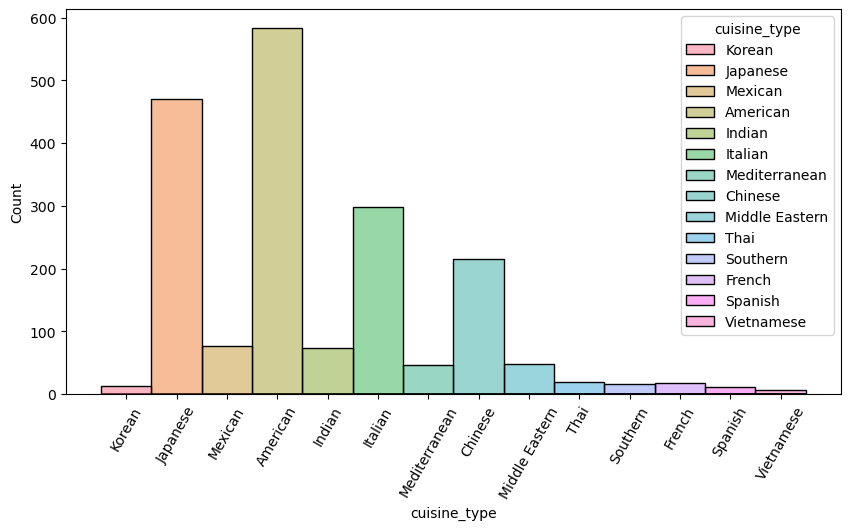

In [55]:
# How the distribution of cuisines look like?
histogram_simple(df, 'cuisine_type', 'cuisine_type')

The highes number of orders are for American cuisine, followed by Japanese. Italian and Chinese
It would be a good field to include the geographical information of where the order are placed. 

- Cost of the order

In [394]:
# Get statistics for the Cost of the orders.
df['cost_of_the_order'].describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

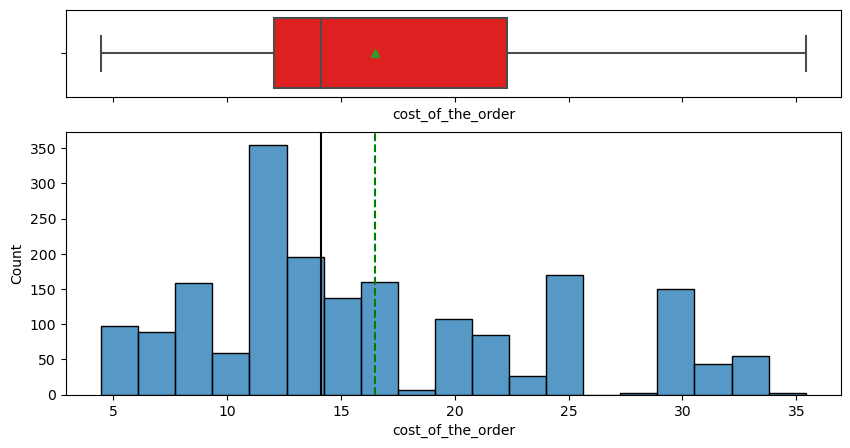

In [56]:
# Show the distribution of Cost
histogram_boxplot(df['cost_of_the_order'])

- There are no outliers, the average cost is approx 16.50 and the median is below the 15 dollars
- The cost is slightely skewed to the right

- **Day of the week**

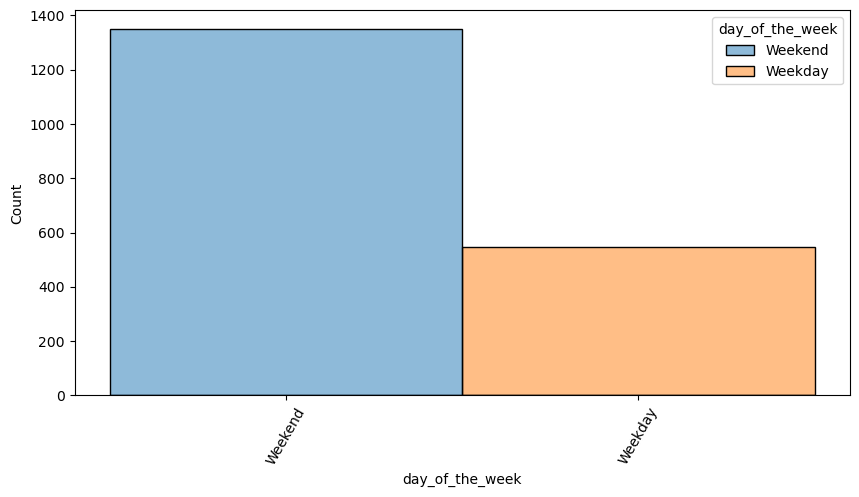

In [57]:
# How is the weekday and weekend distributed?
histogram_simple(df, 'day_of_the_week', 'day_of_the_week')

In [62]:
df['day_of_the_week'].value_counts(normalize=True)

Weekend    0.711802
Weekday    0.288198
Name: day_of_the_week, dtype: float64

- More than 70% of the order are place on weekends.

- **Rating**

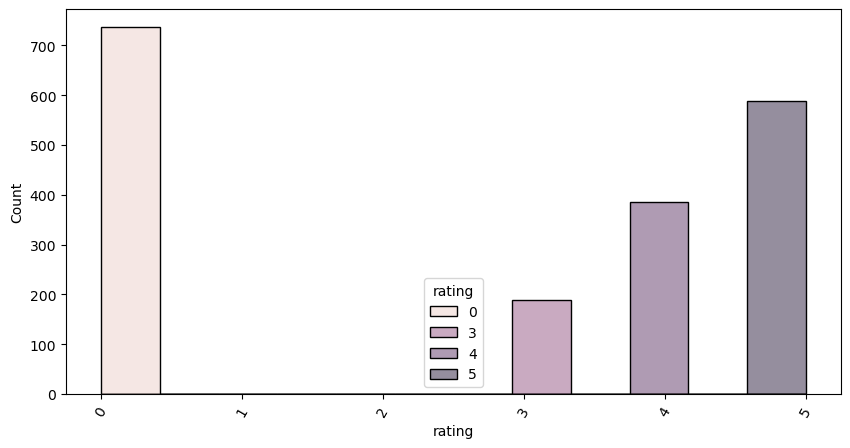

In [63]:
histogram_simple(df, 'rating', 'rating')

In [64]:
df['rating'].value_counts(normalize=True)

0    0.387777
5    0.309800
4    0.203372
3    0.099052
Name: rating, dtype: float64

- 38% of the data is not rated
- 50% gets a rating of 4 or 5, but 10% only gets a rating of 3

- **Food preparation time**

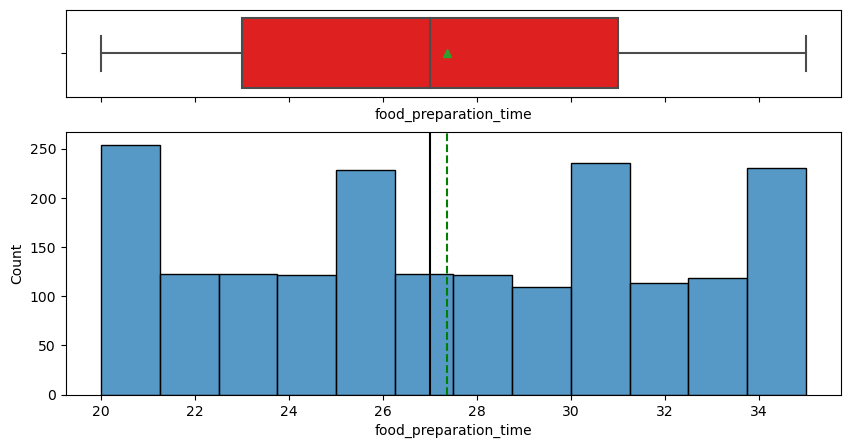

In [65]:
# Show the Food Preparation time distribution
histogram_boxplot(df['food_preparation_time'])

In [66]:
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

- The preparation time is always between 20 and 35 minutes
- The average time is 27.4 minutes 

- **Delivery time**

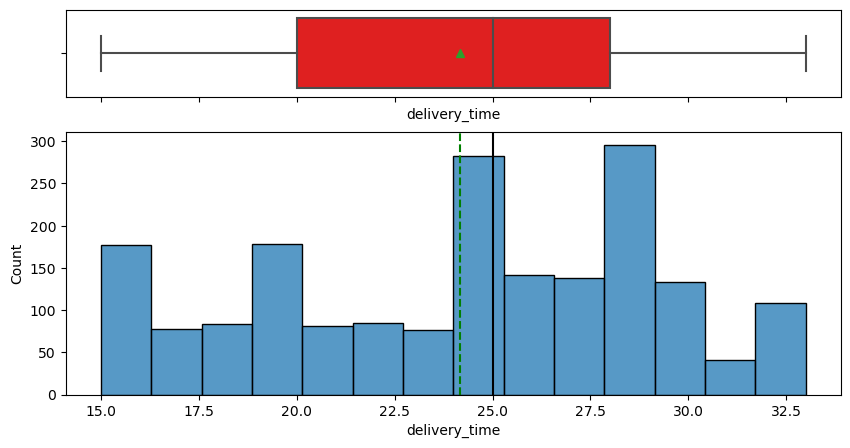

In [67]:
# How about the Delivery time?
histogram_boxplot(df['delivery_time'])

In [68]:
df['delivery_time'].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

- The delivery time is always between 15 and 33 minutes
- The average time is 24.2 minutes 

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [69]:
# Get the 5 top restaurants by number of orders
df['restaurant_name'].value_counts()[0:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [72]:
df.loc[df['restaurant_name']=='Shake Shack']['cuisine_type'].value_counts()

American    219
Name: cuisine_type, dtype: int64

#### Observations:


- Shake Shack is the restaurant with the highes number of order.
- This restaurant serves American cuisine

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [73]:
# Select Weekend rows and get the first entry which will contain the highes count
df_weekend = df[df['day_of_the_week'] == 'Weekend']
cuisines=df_weekend['cuisine_type'].value_counts()
cuisines.keys()[0]

'American'

In [76]:
cuisines

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:


- The most popular cuisines are American, Japanese, Italian and Chinese

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [77]:
# Get orders that cost above 20 dollars
df_more_than_20 = df[df['cost_of_the_order']>20]

In [78]:
#Print percentage of df_more_than 20 with respect to the full data.
print("Percentage of orders that cost more than 20 dollars:", round(df_more_than_20.shape[0]/df.shape[0]*100, 2), '%')

Percentage of orders that cost more than 20 dollars: 29.24 %


#### Observations:


- Almost 30% of the order have a cost of at least 20 dollars.
- Would be useful to include tips in the data as well.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [79]:
# Use mean() method
mean_delivery_t= df['delivery_time'].mean()
print('The mean delivery time for this dataset is', round(mean_delivery_t, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


#### Observations:


- An average of 24 minutes for delivery seems a little high, ways to improve it would be useful.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [80]:
# Find top customers by number of prders placed
most_frequent_customer=df['customer_id'].value_counts()

In [81]:
print(most_frequent_customer[:3])

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


In [82]:
for x in most_frequent_customer.keys().tolist()[:3]:
    print('Customer ID: ', x, 'ordered ',most_frequent_customer[x],'times')

Customer ID:  52832 ordered  13 times
Customer ID:  47440 ordered  10 times
Customer ID:  83287 ordered  9 times


#### Observations:


- Most customers only place 1 order and just a couple of them order at least 10 times.
- Would be useful to include the time period when the orders were placed, is this data for one full week? full month?

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Utility functions

Define some utility functions for comparing multiple variable columns

In [89]:
# Utility function to plot pairs of columns

def point_2plot(df, x, y, figsize=(10, 5)):
    """ Pointplot
    figsize: size of fig (default (15, 10))
    """
    # Pointplot will be created
    sns.pointplot(x = x, y = y, data = df)
    plt.show()

def strip_2plot(df, x, y, figsize=(10, 5)):
    """ Stripplot
    figsize: size of fig (default (15, 10))
    """
    # For stripplot
    sns.stripplot(data=df, x=x, y=y);
    plt.show()

def boxplot_2features(df, x, y, figsize=(10,5)):
    """ Boxplot
    figsize: size of fig (default (15, 10))
    """
    plt.figure(figsize=figsize)
    sns.boxplot(x = x, y = y, data = df, palette = 'pastel')
    plt.xticks(rotation = 60)
    plt.show()    

To help comparing categorial columns for 'cuisine_type' and 'day_of_the_week', create new integer columns.

In [85]:
# Create a replacemnt cuisine types to integer values
cuisines=df['cuisine_type'].value_counts().keys().tolist()
cuisine_list_labeled=pd.Series(np.arange(1,len(cuisines)+1),index=cuisines)
print(cuisine_list_labeled)

American           1
Japanese           2
Italian            3
Chinese            4
Mexican            5
Indian             6
Middle Eastern     7
Mediterranean      8
Thai               9
French            10
Southern          11
Korean            12
Spanish           13
Vietnamese        14
dtype: int64


In [86]:
df['cuisine_type_int'] = df['cuisine_type'].apply(lambda x: cuisine_list_labeled[x])
df['day_of_the_week_int'] = df['day_of_the_week'].apply(lambda x: 1 if x=='Weekday' else 2)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,cuisine_type_int,day_of_the_week_int
0,1477147,337525,Hangawi,Korean,30.75,Weekend,0,25,20,12,2
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,0,25,23,2,2
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5,1
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,1,2
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1,1


Now we have numeric encoded columns for the day of the week and the cuisine.

#### Global correlation between numerical variables

Let's start by analyzing the correlation matrix to identify which columns may be related

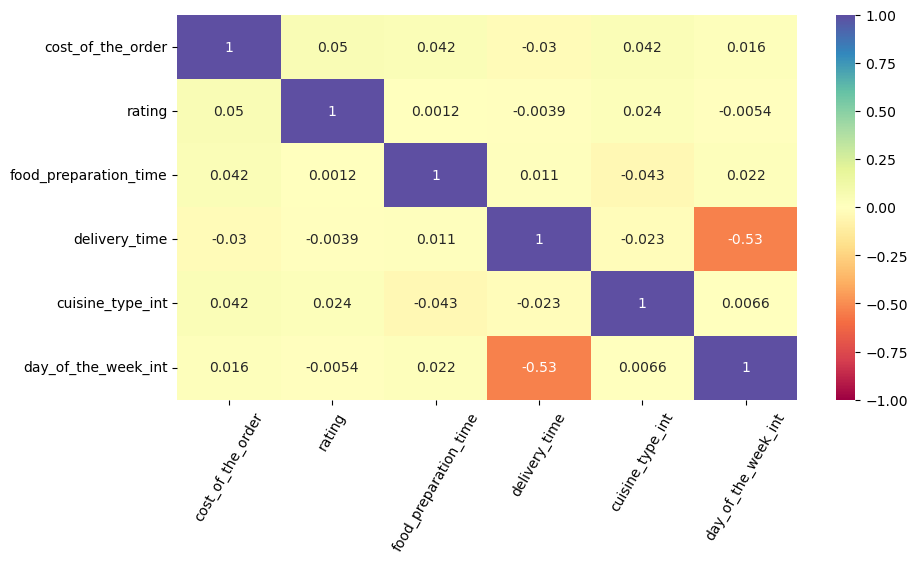

In [87]:
# Use unly numerical columns, except order and customers ids.
cols_num = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time', 'cuisine_type_int', 'day_of_the_week_int']
plt.figure(figsize=(10,5))
sns.heatmap(df[cols_num].corr(numeric_only=True),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.xticks(rotation = 60)
plt.show()

- We see positive correlations between cuisine and (cost, rating, day of the week), we would expect that the preparation type would be related to the type of cuisine.
- We also see a positive correlation of ratings with cost, preparation and delivery time.
- Let's analyze each one of these cases

- **Cusine and Cost of the Order**

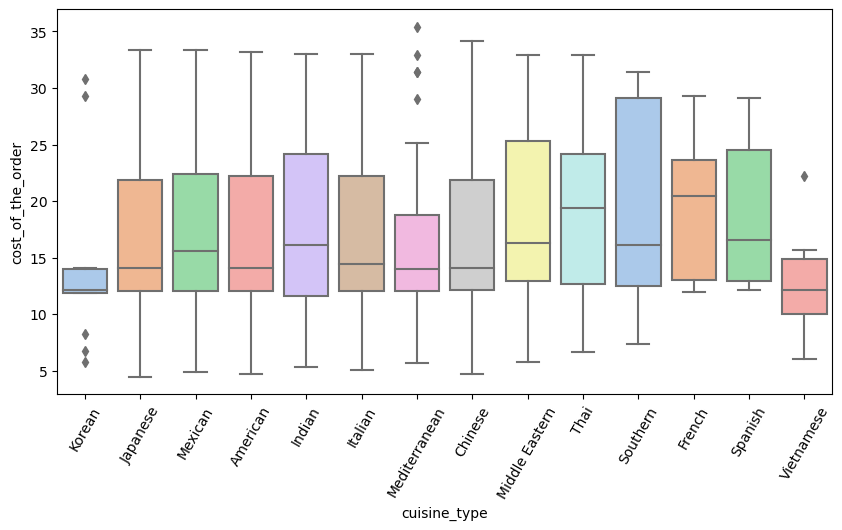

In [94]:
# Relationship between cost of the order and cuisine type
boxplot_2features(df, 'cuisine_type', 'cost_of_the_order')

- Three type of cusine, Korean, Mediterranean dand Vietnamese present outliers.
- This indicates that these types of cusine may represent speciality restaurants for the geographical region

- **Cusine and Food Preparation Time**

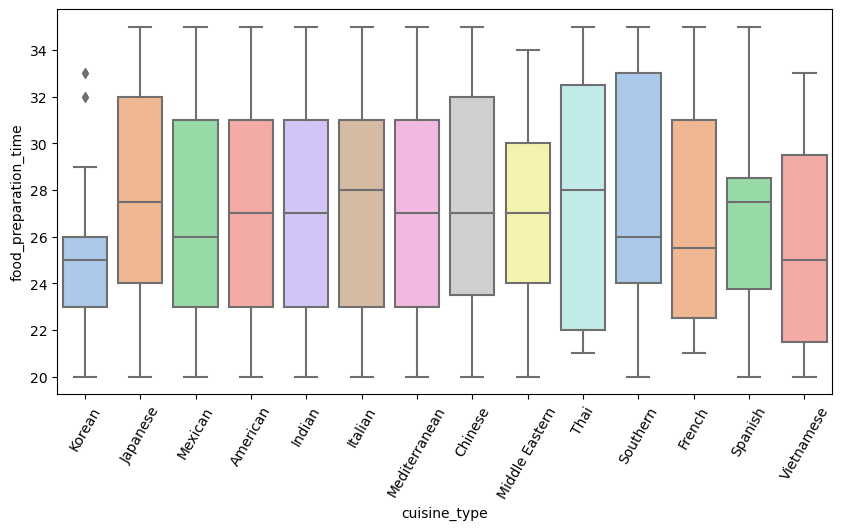

In [97]:
# Relationship between cuisine and Food Preparation Time
boxplot_2features(df, 'cuisine_type', 'food_preparation_time')

Once again we see that Korean food has outliers with respect to the preparation time. This may explain the highers costs.

- **Cuisine and Day of the Week**

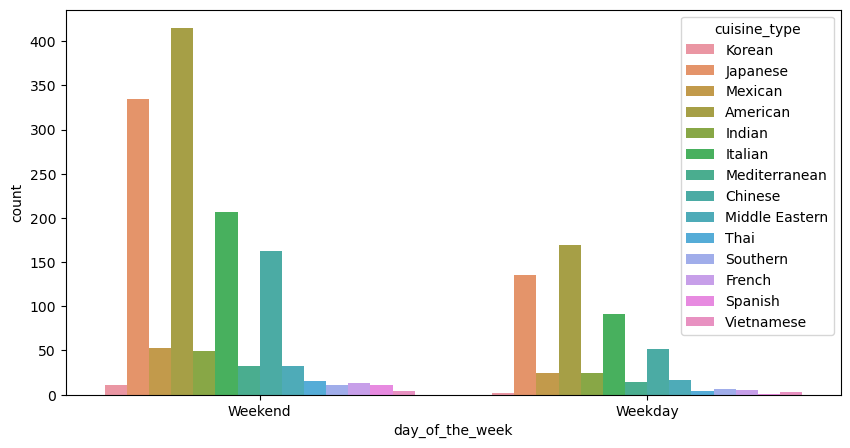

In [98]:
# Relationship between cuisine and Day of the week
countplot_with_hue(df, 'day_of_the_week', 'cuisine_type')

We see a higher volume of order on weekends, however the proportion by cuisine is similar. Note the similaity between the distributions with jsut a change in scale.

- **Cuisine and Rating**

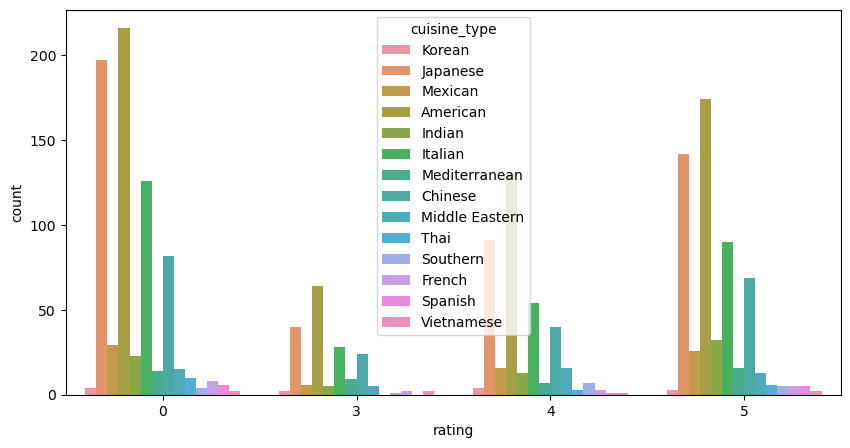

In [99]:
# Relationship between cuisine and rating
countplot_with_hue(df, 'rating', 'cuisine_type')

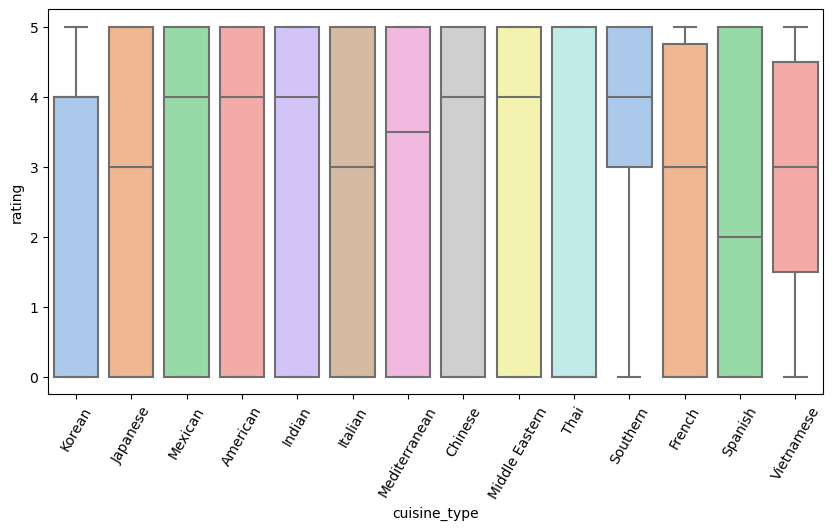

In [100]:
boxplot_2features(df, 'cuisine_type', 'rating')

- We have seen that Korean cuisine show outliers for cost and preparation time, now we see thatthe 75% quartile is at 4, that is less 5 ratings than any other cuisine type.
- For each rating value, including the "Not rated" case, the distribution by cuisine type remains the same.

- **Rating and Delivery time**

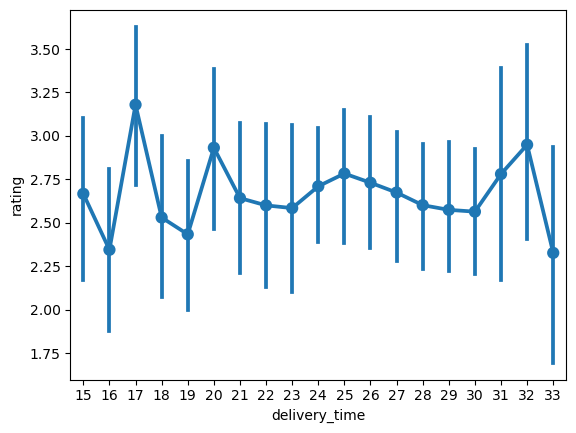

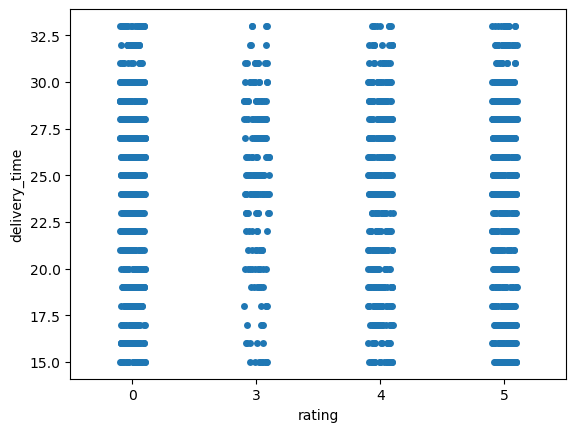

In [104]:
point_2plot(df, 'delivery_time','rating')
strip_2plot(df, 'rating', 'delivery_time')

- We can see a slightly increase in the rating for lower delivery times.
- Note that using rating 0 for 'Not rated' has lowered the mean for rating
- Perhaphs an analysis removing the 'Not rated' rows may be necessary.

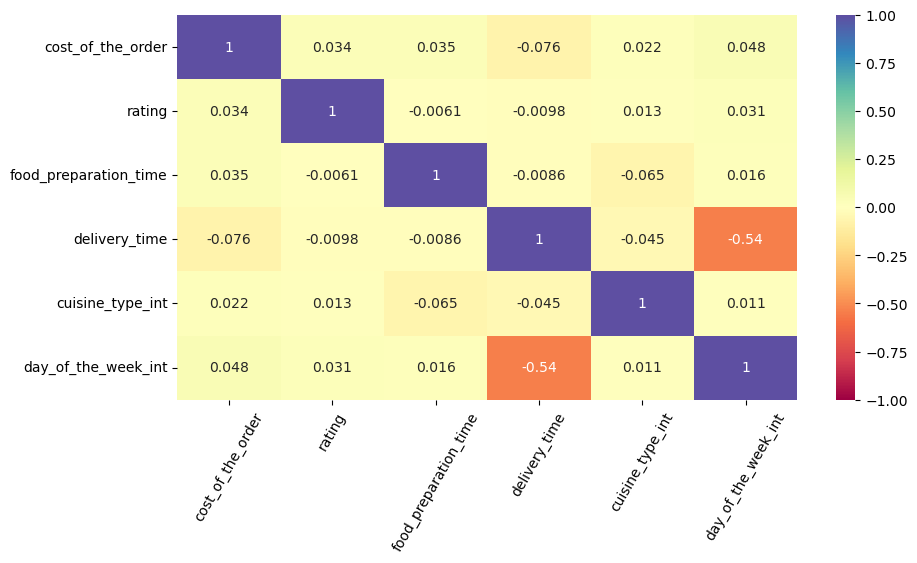

In [122]:
# Use only rows with rating>=3
df_r3=df[df['rating']>=3].copy()
cols_num = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time', 'cuisine_type_int', 'day_of_the_week_int']
plt.figure(figsize=(10,5))
sns.heatmap(df_r3[cols_num].corr(numeric_only=True),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.xticks(rotation = 60)
plt.show()

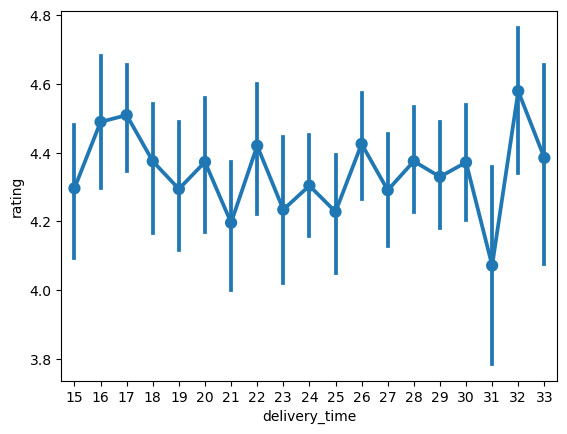

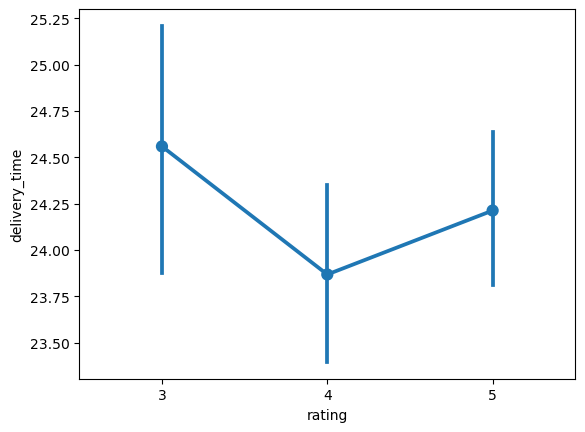

In [117]:
point_2plot(df_r3, 'delivery_time','rating')
point_2plot(df_r3, 'rating', 'delivery_time')

- **Rating and Food preparation time**

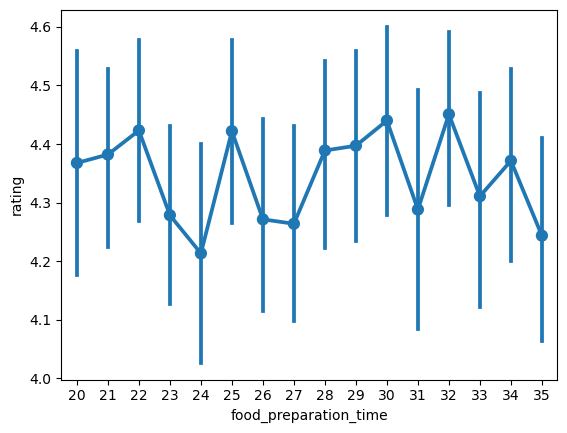

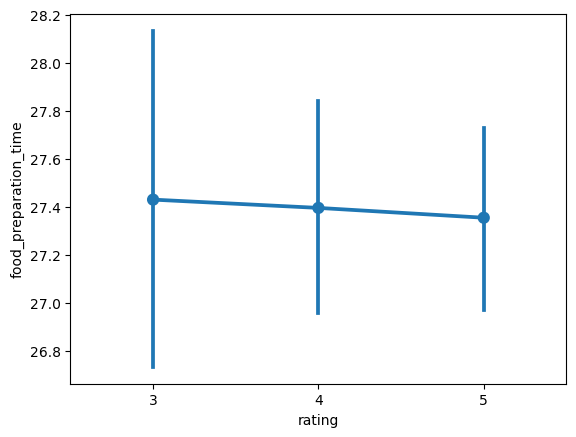

In [118]:
point_2plot(df_r3, 'food_preparation_time', 'rating')
point_2plot(df_r3, 'rating', 'food_preparation_time')

- **Rating and Cost of the order**

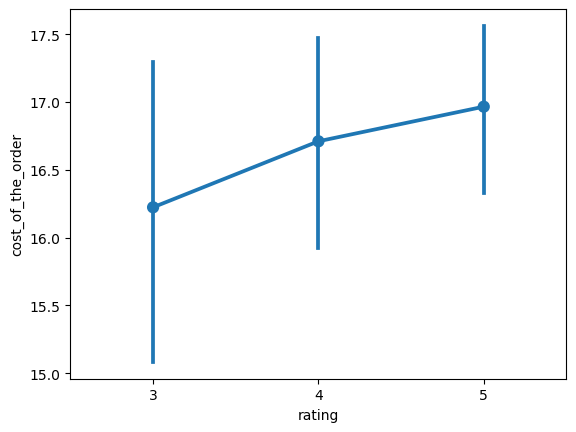

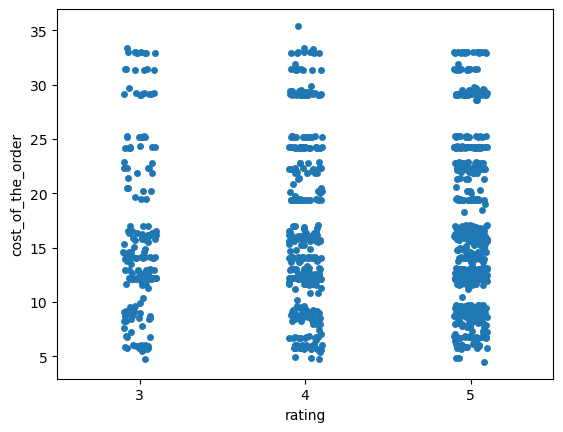

In [121]:
point_2plot(df_r3, 'rating', 'cost_of_the_order')
strip_2plot(df_r3, 'rating','cost_of_the_order')

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [123]:
# Filter the rated restaurants
df_rated = df[df['rating'] >0].copy()

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [124]:
rest_names = df_rating_count[df_rating_count['rating']>50] ['restaurant_name']
print(rest_names)

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object


In [125]:
df_mean = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

In [126]:
for_promotion=df_mean.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

In [127]:
for_promotion.head()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


In [128]:
for_promotion.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,4.0,4.334351,0.126468,4.219178,4.263441,4.30316,4.37407,4.511905


#### Observations:


- Shake Shack is the restaurant with more orders and the highest rating count.
- The number of not rated orders is high, perhaphs custumers must be incentivated to leave a rating by the restaurant.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [129]:
# Create a new column to include the Profit/Revenue
df['Profit'] = df['cost_of_the_order'].apply(lambda x: x*0.25 if x>20 else x*0.15 if x>5 else 0.)
revenue = df['Profit'].sum()
print('The total Revenue is','${:,.2f}'.format(revenue))

The total Revenue is $6,166.30


In [130]:
# What is the total cost of the orders
df['cost_of_the_order'].sum()

31314.82

In [133]:
# What is the percentage Revenue with respect to the total number of sales
df['Profit'].sum()/df['cost_of_the_order'].sum() * 100

19.691325065895317

In [131]:
# Group by restauran to identify which restaurant has the higher sales
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

#### Observations:


- The company is making a 19% revenue of the total cost, that is almost in the middle of the 15/20% comission. 

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [134]:
# Create a new column for the total time.
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

In [135]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,cuisine_type_int,day_of_the_week_int,Profit,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,0,25,20,12,2,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,0,25,23,2,2,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5,1,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,1,2,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1,1,1.7385,49


In [136]:
tot_time=df['total_time'].sort_values(ascending = False)

In [137]:
gt_60 = tot_time[tot_time.gt(60)]

In [140]:
percentage_60=gt_60.shape[0]/df.shape[0]*100
print('Percentage of orders with total delivery time greater than 60 minutes is:', round(percentage_60,3),"%")

Percentage of orders with total delivery time greater than 60 minutes is: 10.537 %


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [141]:
# Get the mean delivery time on weekdays and print it

weekday_mean = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
weekend_mean = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

print('The mean delivery time on weekdays is:', 
      round(weekday_mean),
     'minutes and ', round(weekend_mean), ' minutes on weekdays')

The mean delivery time on weekdays is: 28 minutes and  22  minutes on weekdays


In [142]:
print('It takes', round((weekday_mean-weekend_mean)/weekend_mean*100,2),'% more time on a weekday than on a weekend to deliver an order')

It takes 26.12 % more time on a weekday than on a weekend to deliver an order


#### Observations:


Total time deliveries on weekends is faster than on weekdays. This may be due to traffic at lunch time during week days. 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The data presented was clean with repect to invalid entries.
*  No duplicate record were found.
*  The most popular type of cuisine is American, followed by Japanese, Italian and Chinese.
*  Korean, Mediterranean and Vietnamese cuisines have some outliers in the cost and preparation time. This may indicate that these are speciality restaurants for the region.
*  A large number of orders, 39%, do not have a rating.
*  All the orders are in the 5 to 35 dollars.
*  More than 70% of the order are place on weekends.
*  Revenue is around the 19%, which is between the company's 15% and 25%.
*  There are just a few customers with more than 9 orders.

### Recommendations:

-  Incentivate to improve delivery time
-  Give promo codes to users with a large number of order.
-  Include tip and geographical information, this would help to analyze the prefered cuisine types
-  Include date period so we can estimate revenue per week, months, season, holidays, etc.
-  The number of not rated order is around 39%. A campain to motivate customers to leave a rating will be recommended
-  Include a time of day field so an analisis for breakfast/lunch/dinner and delivery times can be analyzed.

Recommended Columns to be included

* date
* time
* day_of_the_week
* zipcode
* tip_for_restaurant
* tip_for_driver

---